## Análise de dados da empresa LinguaLab

### Introdução

A empresa LinguaLab

In [244]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Estruturação para vizualização correta do dataFrame

In [245]:
df_LinguaLab = pd.read_excel("base_cliente.xlsx", header=None)


df_LinguaLab = df_LinguaLab[0].str.split(",", expand=True)


df_LinguaLab.columns = df_LinguaLab.iloc[0]
df_LinguaLab = df_LinguaLab.drop(0).reset_index(drop=True)


df_LinguaLab.head(15)

,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
0,0,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,58138.0,Ingles,4,19,1983,3.0,4.0
1,1,Trabalho,GraduaÃ§Ã£o,TaubatÃ©,46344.0,Espanhol,4,10,1980,4.0,3.0
2,2,Estudos,graduacao,SÃ£o Bernardo,71613.0,Ingles,3,59,1991,4.0,5.0
3,3,Viagem,graduacao,SÃ£o Paulo,,Espanhol,4,22,2010,1,1.0
4,4,Trabalho,Doutorado,SÃ£o Paulo,58293.0,Ingres,3,8,2007,3.0,4.0
5,5,Trabalho,Mestrado,SÃ£o Paulo,,Espanhol,3,9,1993,4.0,4.0
6,6,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,55635.0,Espanhol,4,12,1997,2.0,4.0
7,7,Estudos,Doutorado,Campinas,33454.0,Ingres,3,45,2011,2.0,2.0
8,8,Trabalho,Doutorado,SÃ£o Paulo,30351.0,Ingles,4,45,2000,1,2.0
9,9,Trabalho,Doutorado,SÃ£o Bernardo,5648.0,Ingres,5,12,1976,1,1.0


## Identificação dos problemas

In [246]:
df_LinguaLab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID_Cliente         2240 non-null   object
 1   Motivo             2240 non-null   object
 2   Education          2240 non-null   object
 3   Cidade             2240 non-null   object
 4   Renda_anual        2240 non-null   object
 5   Aulas              2240 non-null   object
 6   NPS                2240 non-null   object
 7   Num_Aulas          2240 non-null   object
 8   Ano_de_nascimento  2240 non-null   object
 9   Banheiros_na_casa  2240 non-null   object
 10  Quartos_na_casa    2240 non-null   object
dtypes: object(11)
memory usage: 192.6+ KB


In [247]:
colunas_numericas = [
    "ID_Cliente",
    "Renda_anual",
    "NPS",
    "Num_Aulas",
    "Ano_de_nascimento",
    "Banheiros_na_casa",
    "Quartos_na_casa"
]

colunas_categoricas = [
    "Motivo",
    "Education",
    "Cidade",
    "Aulas"
]



Padroniza a linguagem do DataFrame

In [248]:
df_LinguaLab["Education"] = df_LinguaLab["Education"].replace({
    "GraduaÃ§Ã£o": "Graduação",
    "graduacao": "Graduação",
    "Ensino MÃ©dio": "Ensino Médio"
})

df_LinguaLab["Cidade"] = df_LinguaLab["Cidade"].replace({
    "SÃ£o Paulo": "São Paulo",
    "TaubatÃ©": "Taubaté",
    "SÃ£o Bernardo": "São Bernardo"
})

df_LinguaLab["Aulas"] = df_LinguaLab["Aulas"].replace({
    "Ingres": "Inglês",
    "Ingles": "Inglês",
    "Espanhol e Ingles": "Espanhol e Inglês"
})

Transforma valores faltantes em NaN e converte objetos para categorias

In [249]:
df_LinguaLab[colunas_categoricas] = df_LinguaLab[colunas_categoricas].replace("", np.nan)
df_LinguaLab[colunas_categoricas] = df_LinguaLab[colunas_categoricas].astype('category')

Transforma as categorias de objetos em numéricos, além de converter valores inválidos em NaN

In [250]:
df_LinguaLab[colunas_numericas] = df_LinguaLab[colunas_numericas].apply(pd.to_numeric, errors='coerce')


In [251]:
df_LinguaLab["Idade"] = 2025 - df_LinguaLab["Ano_de_nascimento"]


In [252]:
df_LinguaLab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID_Cliente         2240 non-null   int64   
 1   Motivo             2128 non-null   category
 2   Education          2240 non-null   category
 3   Cidade             2240 non-null   category
 4   Renda_anual        1901 non-null   float64 
 5   Aulas              2240 non-null   category
 6   NPS                2240 non-null   int64   
 7   Num_Aulas          2240 non-null   int64   
 8   Ano_de_nascimento  2240 non-null   int64   
 9   Banheiros_na_casa  2240 non-null   float64 
 10  Quartos_na_casa    2240 non-null   float64 
 11  Idade              2240 non-null   int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 149.6 KB


## Identificação de valores nulos

In [253]:
quantidade_nans = df_LinguaLab.isna().sum()
print(quantidade_nans)



0
ID_Cliente             0
Motivo               112
Education              0
Cidade                 0
Renda_anual          339
Aulas                  0
NPS                    0
Num_Aulas              0
Ano_de_nascimento      0
Banheiros_na_casa      0
Quartos_na_casa        0
Idade                  0
dtype: int64


### Analise das variaveis categoricas

In [254]:
for coluna in df_LinguaLab.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_LinguaLab[coluna].unique())
    print('-' * 50)


Valores únicos da coluna 'Motivo':
['Viagem', 'Trabalho', 'Estudos', NaN]
Categories (3, object): ['Estudos', 'Trabalho', 'Viagem']
--------------------------------------------------
Valores únicos da coluna 'Education':
['Graduação', 'Doutorado', 'Mestrado', 'Ensino Fundamental', 'Ensino Médio']
Categories (5, object): ['Doutorado', 'Ensino Fundamental', 'Ensino Médio', 'Graduação', 'Mestrado']
--------------------------------------------------
Valores únicos da coluna 'Cidade':
['São Paulo', 'Taubaté', 'São Bernardo', 'Campinas', 'Rio Branco']
Categories (5, object): ['Campinas', 'Rio Branco', 'São Bernardo', 'São Paulo', 'Taubaté']
--------------------------------------------------
Valores únicos da coluna 'Aulas':
['Inglês', 'Espanhol', 'Mandarim', 'Espanhol e Inglês']
Categories (4, object): ['Espanhol', 'Espanhol e Inglês', 'Inglês', 'Mandarim']
--------------------------------------------------


Criando a categoria "Outros" para motivos não especificados

In [255]:
if "Outros" not in df_LinguaLab["Motivo"].cat.categories:
    df_LinguaLab["Motivo"] = df_LinguaLab["Motivo"].cat.add_categories(["Outros"])

df_LinguaLab["Motivo"] = df_LinguaLab["Motivo"].fillna("Outros")


In [256]:
for coluna in df_LinguaLab.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_LinguaLab[coluna].value_counts())
    print('-' * 50)


Valores únicos da coluna 'Motivo':
Motivo
Trabalho    896
Estudos     784
Viagem      448
Outros      112
Name: count, dtype: int64
--------------------------------------------------
Valores únicos da coluna 'Education':
Education
Graduação             1127
Doutorado              486
Mestrado               370
Ensino Médio           203
Ensino Fundamental      54
Name: count, dtype: int64
--------------------------------------------------
Valores únicos da coluna 'Cidade':
Cidade
São Paulo       1567
São Bernardo     326
Campinas         231
Taubaté           68
Rio Branco        48
Name: count, dtype: int64
--------------------------------------------------
Valores únicos da coluna 'Aulas':
Aulas
Inglês               1008
Espanhol              896
Espanhol e Inglês     224
Mandarim              112
Name: count, dtype: int64
--------------------------------------------------


In [257]:
fundamental = df_LinguaLab.loc[df_LinguaLab["Education"] == "Mestrado"]

fundamental['Renda_anual'].isnull().sum()

64

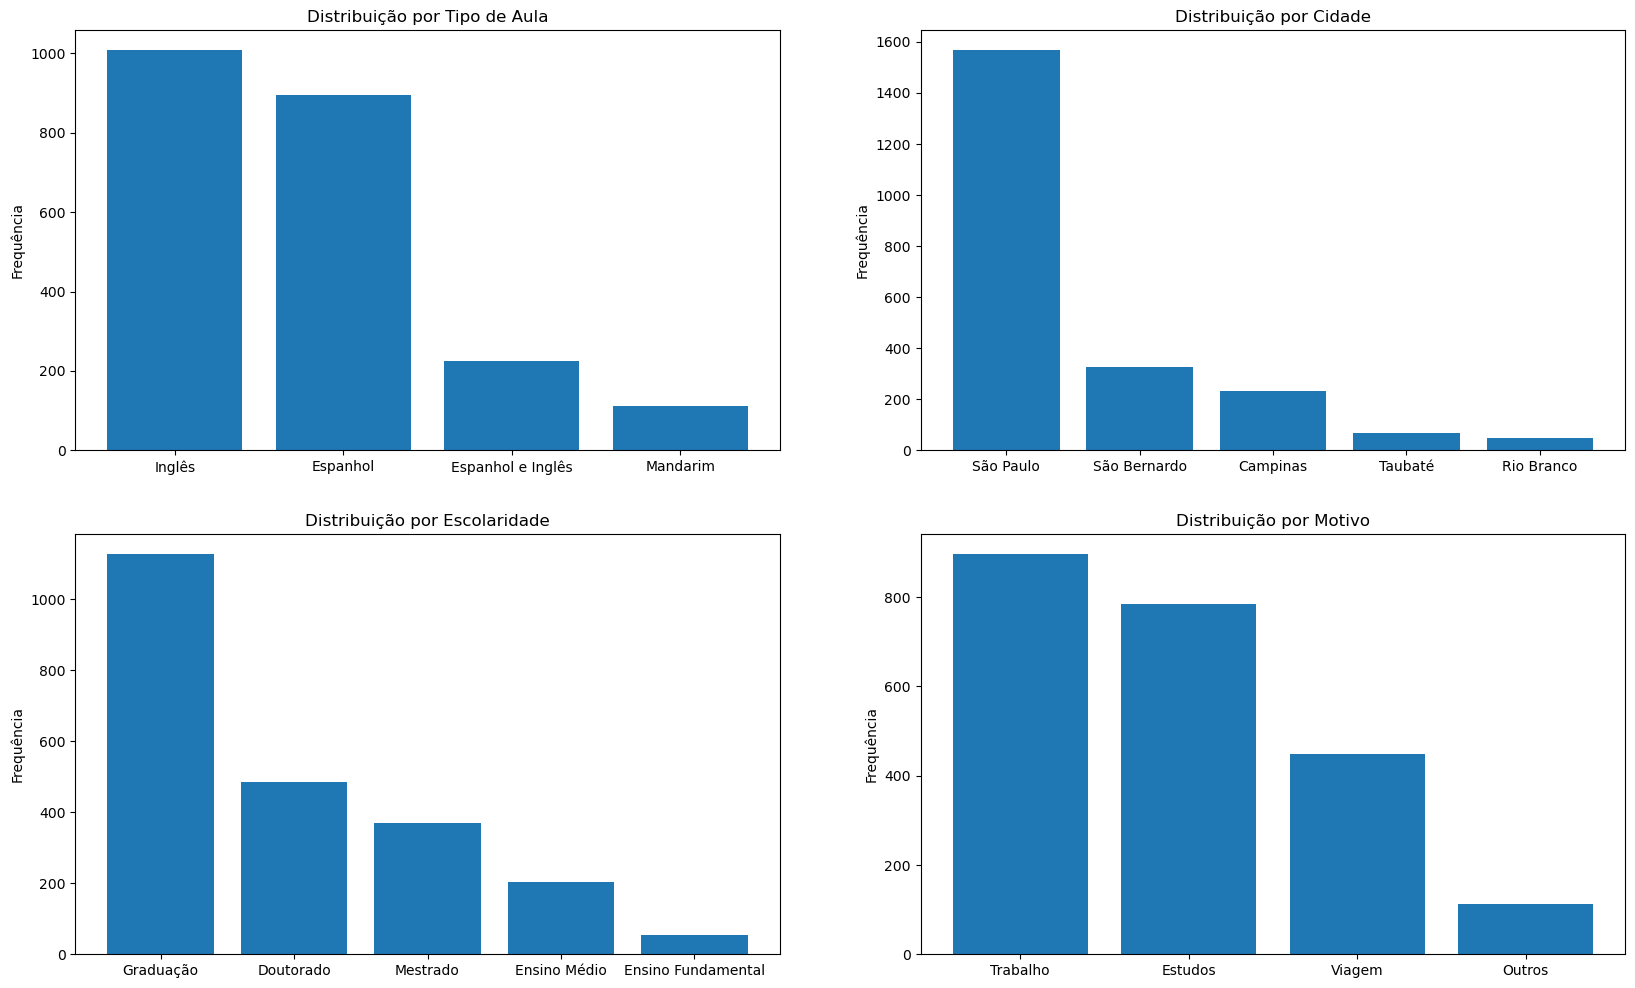

In [258]:
plt.figure(figsize=(20, 12))


plt.subplot(2, 2, 1)
counts = df_LinguaLab['Aulas'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição por Tipo de Aula')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
counts = df_LinguaLab['Cidade'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição por Cidade')
plt.ylabel('Frequência')

plt.subplot(2, 2, 3)
counts = df_LinguaLab['Education'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição por Escolaridade')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
counts = df_LinguaLab['Motivo'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição por Motivo')
plt.ylabel('Frequência')


plt.show()

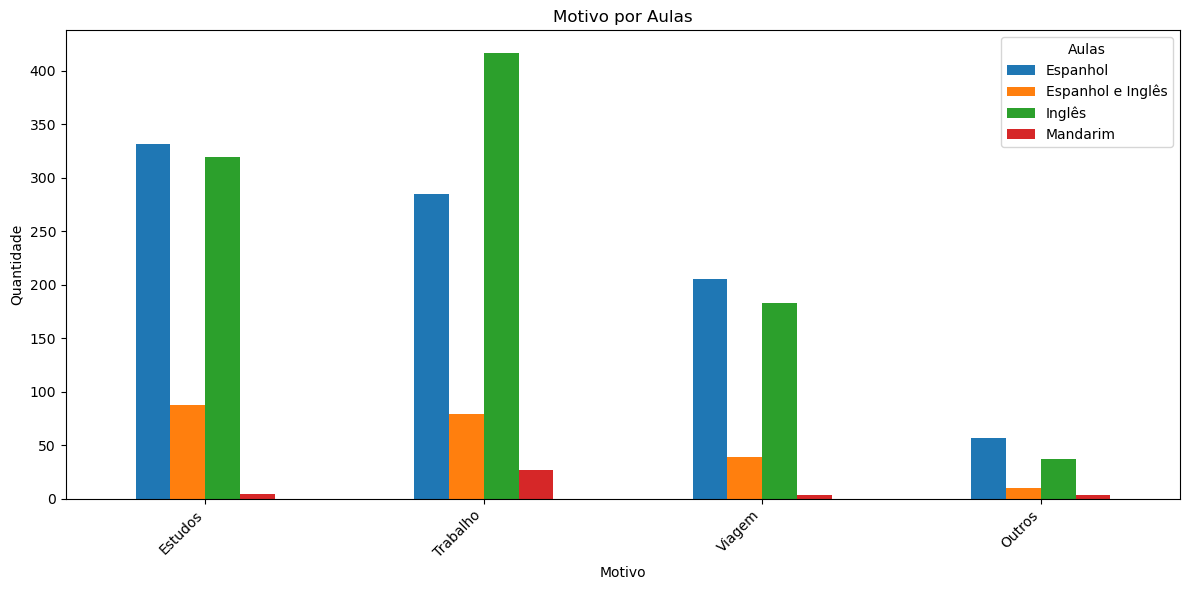

In [302]:
pd.crosstab(df_LinguaLab['Motivo'], df_LinguaLab['Aulas']).plot(kind='bar', figsize=(12, 6))
plt.title('Motivo por Aulas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


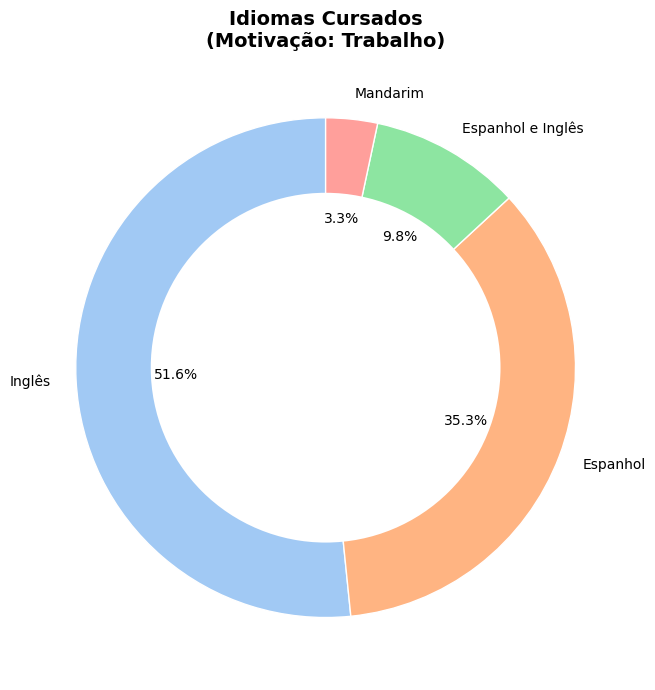

In [ ]:
# Filtrar base: apenas alunos com motivo "Trabalho"
df_trabalho = df_LinguaLab[df_LinguaLab['Motivo'] == 'Trabalho']

# Contar proporções dos idiomas cursados
idiomas = df_trabalho['Aulas'].value_counts(normalize=True).sort_values(ascending=False)
cores = sns.color_palette('pastel', len(idiomas))  # outras opções: 'Set2', 'husl', 'tab10'


fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    idiomas.values, 
    labels=idiomas.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    colors=cores,
    textprops=dict(color="black", fontsize=10)
)

# Central circle para "donut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Título estilizado
plt.title('Idiomas Cursados\n(Motivação: Trabalho)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Análise das variaveis numéricas

In [260]:
for coluna in colunas_numericas:
    print(f"Estatísticas da coluna '{coluna}':")
    print(df_LinguaLab[coluna].describe().round(3))
    print('-' * 50)

Estatísticas da coluna 'ID_Cliente':
count    2240.000
mean     1119.500
std       646.777
min         0.000
25%       559.750
50%      1119.500
75%      1679.250
max      2239.000
Name: ID_Cliente, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'Renda_anual':
count      1901.000
mean      51920.873
std       21284.505
min        1730.000
25%       35340.000
50%       51717.000
75%       68316.000
max      162397.000
Name: Renda_anual, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'NPS':
count    2240.000
mean        2.836
std         1.201
min         1.000
25%         2.000
50%         3.000
75%         4.000
max         5.000
Name: NPS, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'Num_Aulas':
count    2240.000
mean       20.305
std        19.819
min         1.000
25%         8.000
50%        14.000
75%        26.000
max        99.000
Name: Num_Aulas, dtyp

In [261]:


# df_LinguaLab["Renda_anual"] = df_LinguaLab.apply(preencher_renda, axis=1)

### Identificação de Outliers

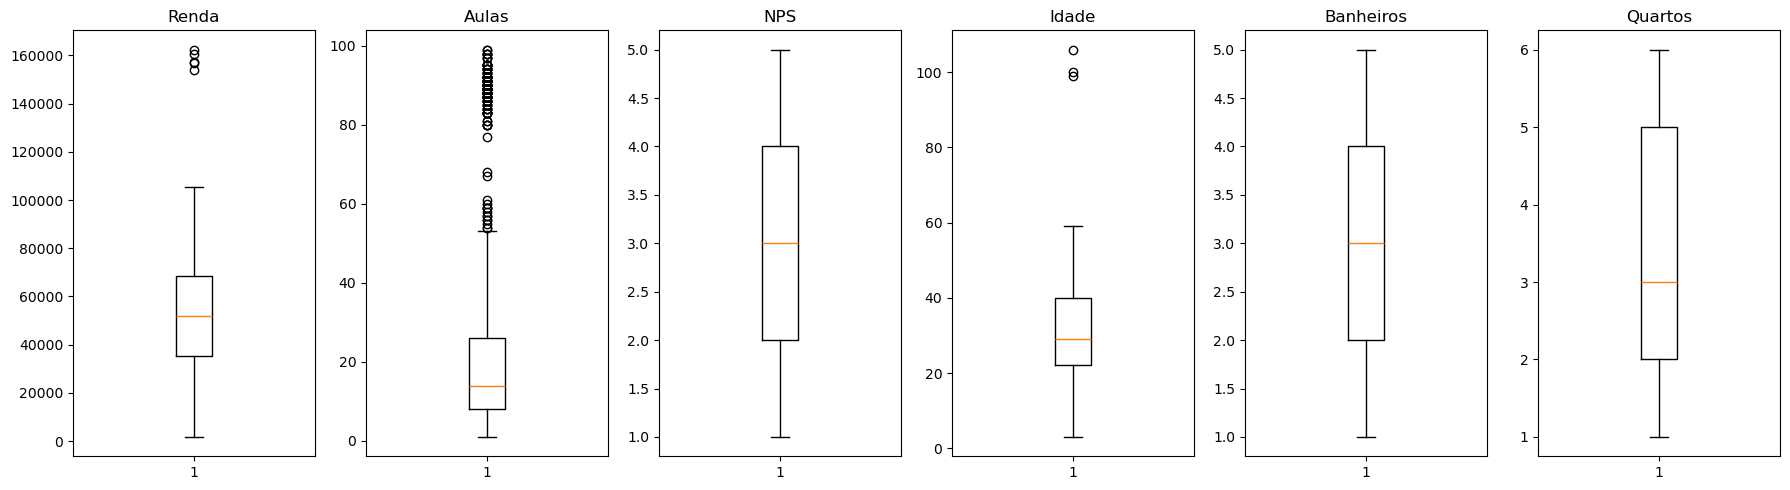

In [262]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 6, 1)
plt.boxplot(df_LinguaLab["Renda_anual"].dropna())
plt.title("Renda")

plt.subplot(1, 6, 2)
plt.boxplot(df_LinguaLab["Num_Aulas"].dropna())
plt.title("Aulas")

plt.subplot(1, 6, 3)
plt.boxplot(df_LinguaLab["NPS"].dropna())
plt.title("NPS")

plt.subplot(1, 6, 4)
plt.boxplot(df_LinguaLab["Idade"].dropna())
plt.title("Idade")

plt.subplot(1, 6, 5)
plt.boxplot(df_LinguaLab["Banheiros_na_casa"].dropna())
plt.title("Banheiros")

plt.subplot(1, 6, 6)
plt.boxplot(df_LinguaLab["Quartos_na_casa"].dropna())
plt.title("Quartos")


plt.tight_layout()
plt.show()

Identificação do limite superior para remoção dos outliers de renda e idade

In [263]:
import numpy as np


p95_renda = np.percentile(df_LinguaLab["Renda_anual"].dropna(), 95)
p99_qntAula = np.percentile(df_LinguaLab["Num_Aulas"].dropna(), 97)

df_LinguaLab = df_LinguaLab[
    (df_LinguaLab["Renda_anual"].isna() | df_LinguaLab["Renda_anual"].between(0, p95_renda)) 
]

df_LinguaLab = df_LinguaLab[
    (df_LinguaLab["Num_Aulas"].isna() | df_LinguaLab["Num_Aulas"].between(0, p99_qntAula))
]
df_LinguaLab.shape


(2088, 12)

Histogramas de frequência das variáveis numéricas

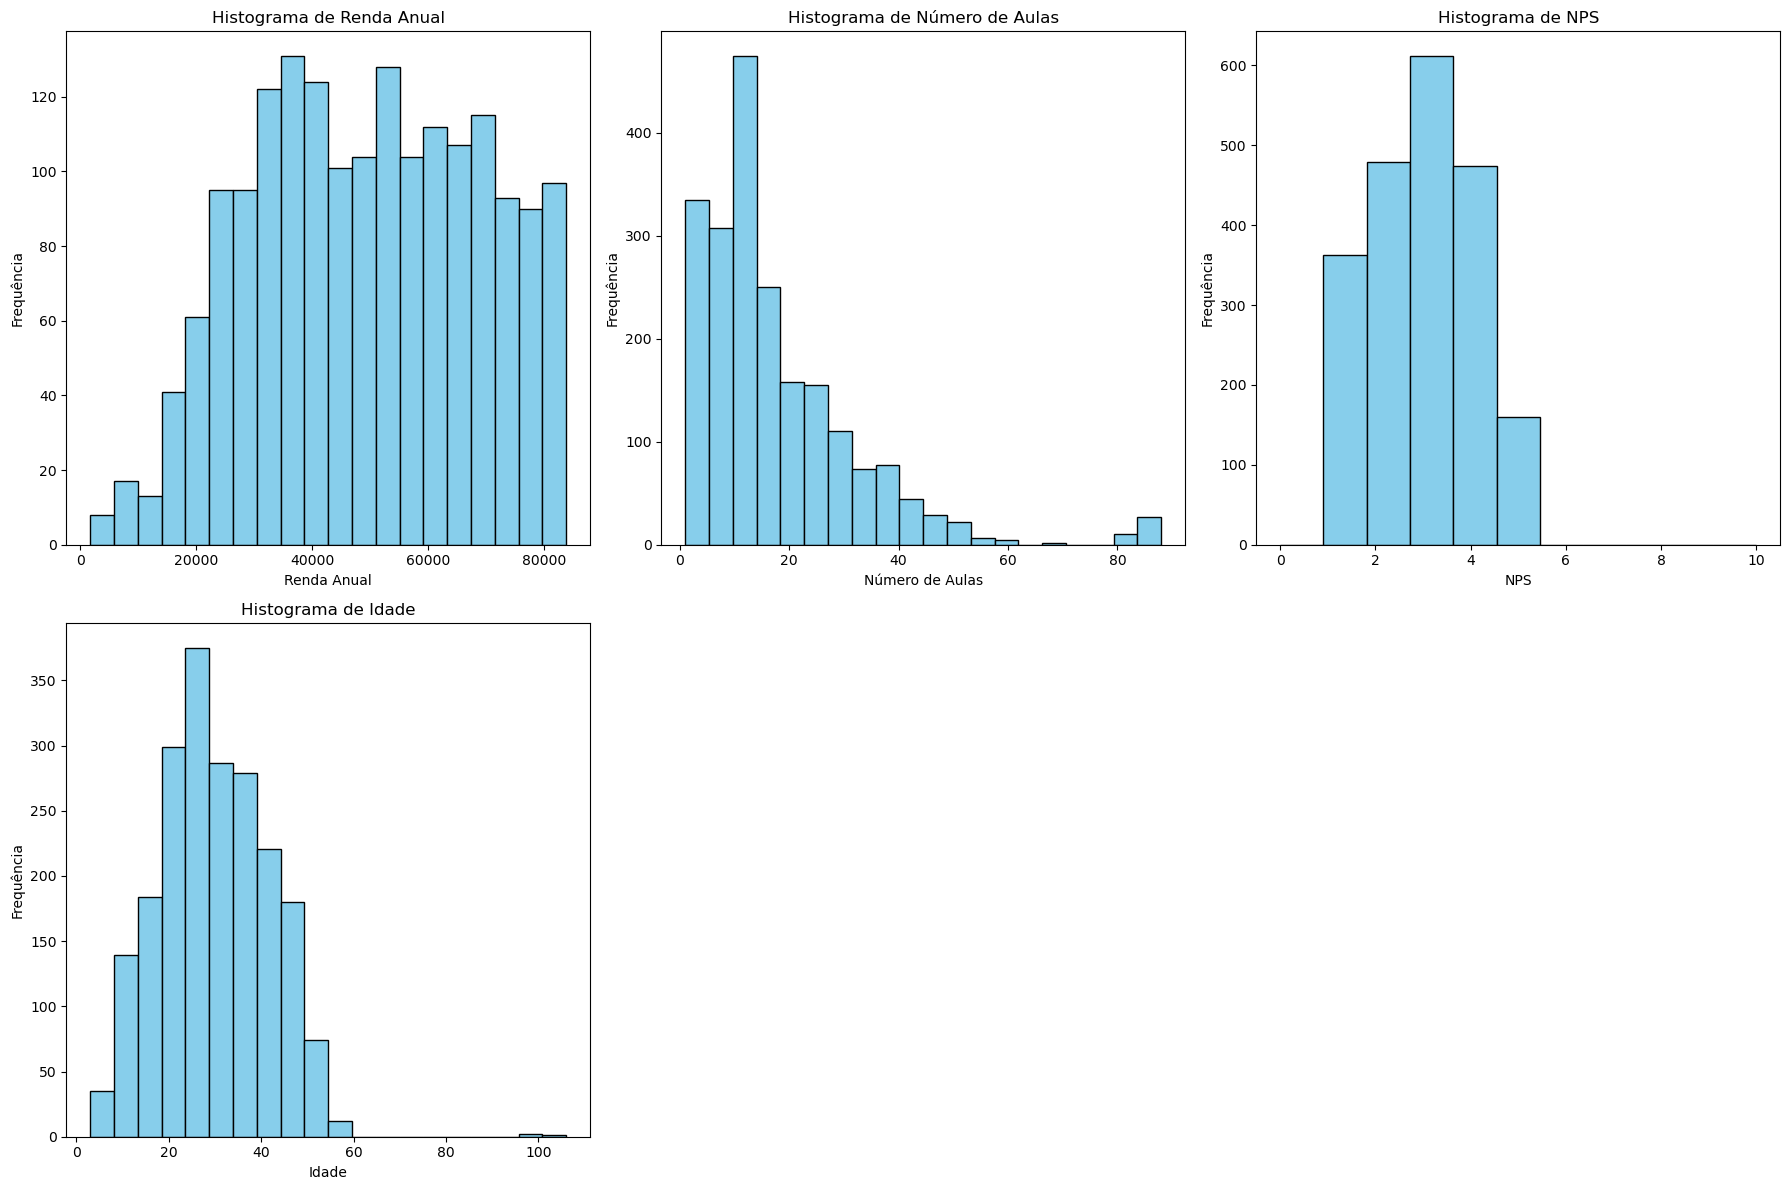

In [264]:
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
plt.hist(df_LinguaLab["Renda_anual"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de Renda Anual")
plt.xlabel("Renda Anual")
plt.ylabel("Frequência")


plt.subplot(2, 3, 2)
plt.hist(df_LinguaLab["Num_Aulas"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de Número de Aulas")
plt.xlabel("Número de Aulas")
plt.ylabel("Frequência")


plt.subplot(2, 3, 3)
plt.hist(df_LinguaLab["NPS"].dropna(), bins=11, range=(0,10), color='skyblue', edgecolor='black')
plt.title("Histograma de NPS")
plt.xlabel("NPS")
plt.ylabel("Frequência")


plt.subplot(2, 3, 4)
plt.hist(df_LinguaLab["Idade"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Histograma de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")


plt.tight_layout()
plt.show()

## Criar dummies para identificar correlações entre variaveis

In [265]:
colunas_relevantes = [
    'Motivo', 'Education', 'Cidade', 'Aulas',
    'Idade', 'Num_Aulas', 'NPS',
    'Banheiros_na_casa', 'Quartos_na_casa', 'Renda_anual'
]

df_corr = df_LinguaLab[colunas_relevantes].copy()

df_dummies_corr = pd.get_dummies(df_corr, drop_first=True, dtype=int)


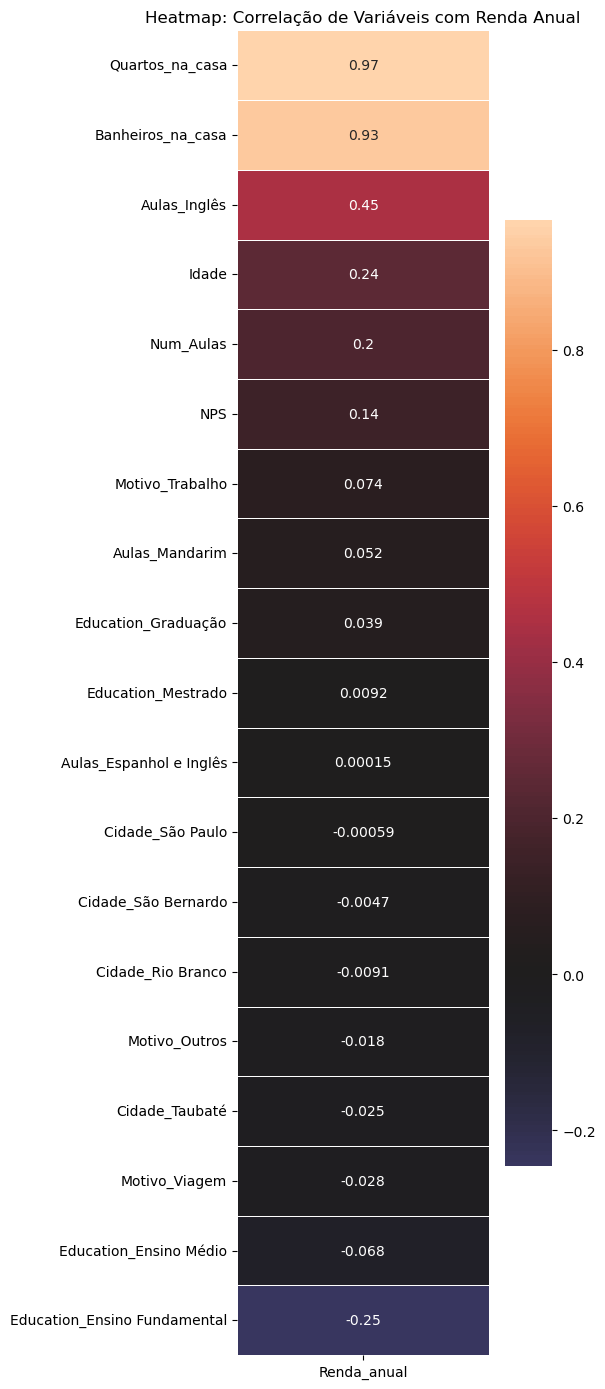

In [266]:
correlacoes_com_renda = df_dummies_corr.corr()["Renda_anual"].drop("Renda_anual").sort_values()

# Plotar heatmap
plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_com_renda.to_frame(), annot=True, center=0, linewidths=0.5)
plt.title('Heatmap: Correlação de Variáveis com Renda Anual')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Analizando a influencia das variaveis na renda anual, percebe-se que a quantidade de quartos e banheiros tem uma correlação forte, as aulas de ingles tem uma correlação media e as variaveis número de aulas e idade tem uma correlação baixa, todas sendo positivas.

Além disso, a variavel que fala sobre alunos com educação de ensino fundamental tem uma correlação baixa e negativa.

## Implementação de Regressões para inputar valores faltantes na renda anual

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df_dummies_corr.drop(columns=["Renda_anual"])
y = df_dummies_corr["Renda_anual"]


mask = y.notna()
X = X[mask]
y = y[mask]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)





LinearRegression()

In [268]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = modelo.predict(X_test)

# Avaliação
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


MAE: 3074.7541716280516
RMSE: 4290.152381106043
R²: 0.9512840405400422


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [269]:
comparativo = pd.DataFrame({
    "Renda Real": y_test,
    "Renda Prevista": modelo.predict(X_test)
})
comparativo["Erro Absoluto"] = abs(comparativo["Renda Real"] - comparativo["Renda Prevista"])
comparativo = comparativo.sort_values("Erro Absoluto", ascending=False)

comparativo.head(10)

,Renda Real,Renda Prevista,Erro Absoluto
1524,3502.000000,23561.298416,20059.298416
981,4861.000000,23513.033987,18652.033987
2214,5305.000000,23354.276011,18049.276011
2228,52247.251354,34745.779766,17501.471588
133,52247.251354,34948.266981,17298.984373
58,52247.251354,35369.651197,16877.600157
2059,52247.251354,35536.263754,16710.987600
724,7500.000000,23830.470722,16330.470722
774,6835.000000,22614.047056,15779.047056
1536,9255.000000,23856.196155,14601.196155


In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

y_pred_rf = rfr.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)


MAE: 2763.7654072482496
RMSE: 3708.3079190856774
R²: 0.963602009995788


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [271]:
comparativo2 = pd.DataFrame({
    "Renda Real": y_test,
    "Renda Prevista": rfr.predict(X_test)
})
comparativo2["Erro Absoluto"] = abs(comparativo2["Renda Real"] - comparativo2["Renda Prevista"])
comparativo2 = comparativo2.sort_values("Erro Absoluto", ascending=False)

comparativo2.head(10)

,Renda Real,Renda Prevista,Erro Absoluto
981,4861.0,23561.39,18700.39
2214,5305.0,23098.07,17793.07
1524,3502.0,20999.68,17497.68
724,7500.0,21849.47,14349.47
2230,11012.0,25089.69,14077.69
1704,9722.0,22735.84,13013.84
1536,9255.0,19569.08,10314.08
74,28332.0,18295.61,10036.39
428,10404.0,20097.71,9693.71
1746,28389.0,18948.75,9440.25


In [272]:
df_disponivel = df_LinguaLab[df_LinguaLab["Renda_anual"].notna()].copy()
df_treino, df_teste = train_test_split(df_disponivel, test_size=0.2, random_state=42)

df_teste["Renda_anual_original"] = df_teste["Renda_anual"]
df_teste["Renda_anual"] = np.nan


In [273]:
medianas = df_treino.groupby(["Banheiros_na_casa", "Quartos_na_casa"])["Renda_anual"].median()

def preencher_renda(row):
    if pd.isna(row["Renda_anual"]):
        chave = (row["Banheiros_na_casa"], row["Quartos_na_casa"])
        return medianas.get(chave, np.nan)
    return row["Renda_anual"]

df_teste["Renda_prevista"] = df_teste.apply(preencher_renda, axis=1)


In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = df_teste["Renda_anual_original"]
y_pred = df_teste["Renda_prevista"]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
print("R²:", r2_score(y_true, y_pred))


MAE: 2777.2357954545455
RMSE: 3812.105017542503
R²: 0.9602142250070013


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Erro Absoluto Médio): média da diferença absoluta entre renda real e prevista.

RMSE (Raiz do Erro Quadrático Médio): penaliza mais fortemente grandes erros.

R² (Coeficiente de Determinação): indica quanto da variação da renda é explicada pela estimativa. Pode ser negativo se o modelo for pior que a média.

## Melhor Modelo: Agrupamento por Mediana

Dentre os três métodos testados (Regressão Linear, Random Forest e Agrupamento por Mediana), o **modelo baseado em mediana por número de banheiros e quartos** apresentou o melhor desempenho:

- **Menor MAE** (erro absoluto médio)
- **Menor RMSE** (erro médio quadratico)
- **Maior R²** (poder explicativo)

Além de eficaz, é simples e fácil de interpretar, sendo a melhor escolha atual para prever a renda anual dos clientes.


In [275]:
df_LinguaLab["Renda_anual"] = df_LinguaLab.apply(preencher_renda, axis=1)

##### Agora que o valor estimado substituiu os valores nulos de renda, podemos partir para a análise bivariada e clusterização

In [276]:
df_LinguaLab.head()

,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa,Idade
0,0,Viagem,Graduação,São Paulo,58138.0,Inglês,4,19,1983,3.0,4.0,42
1,1,Trabalho,Graduação,Taubaté,46344.0,Espanhol,4,10,1980,4.0,3.0,45
2,2,Estudos,Graduação,São Bernardo,71613.0,Inglês,3,59,1991,4.0,5.0,34
3,3,Viagem,Graduação,São Paulo,23046.0,Espanhol,4,22,2010,1.0,1.0,15
4,4,Trabalho,Doutorado,São Paulo,58293.0,Inglês,3,8,2007,3.0,4.0,18


Feature Engeneering

In [277]:
df_LinguaLab['Categoria_Renda'] = pd.cut(df_LinguaLab['Renda_anual'], 
                              bins=[0, 35000, 55000, float('inf')], 
                              labels=['Baixa', 'Média', 'Alta'])

df_LinguaLab['Faixa_Etaria'] = pd.cut(df_LinguaLab['Idade'], 
                           bins=[0, 25, 40, float('inf')], 
                           labels=['Jovem', 'Adulto', 'Sênior'])


## Graficos de assistencia a mercadologica

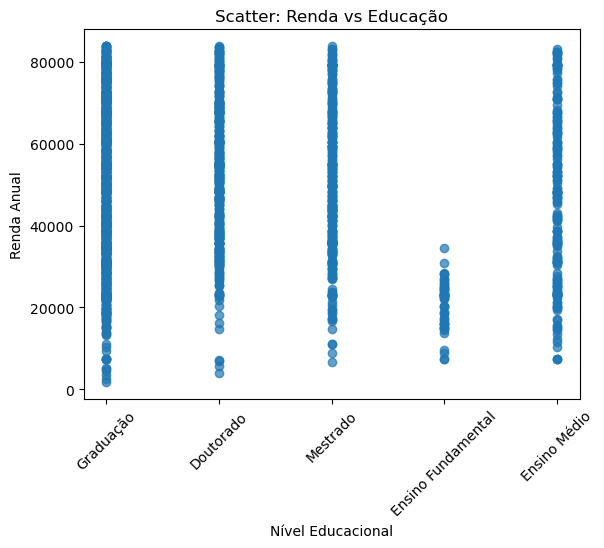

In [278]:

plt.scatter(df_LinguaLab['Education'], df_LinguaLab['Renda_anual'], alpha=0.7)
plt.xlabel('Nível Educacional')
plt.ylabel('Renda Anual')
plt.title('Scatter: Renda vs Educação')
plt.xticks(rotation=45)
plt.show()

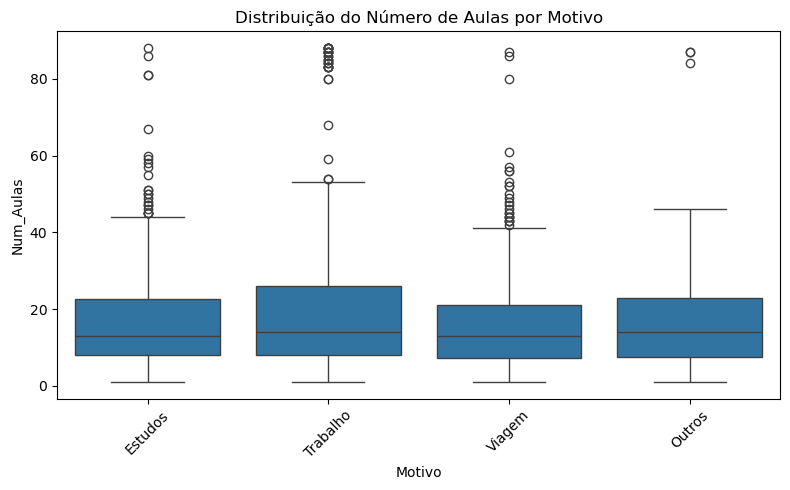

In [287]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_LinguaLab, x='Motivo', y='Num_Aulas')
plt.title('Distribuição do Número de Aulas por Motivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


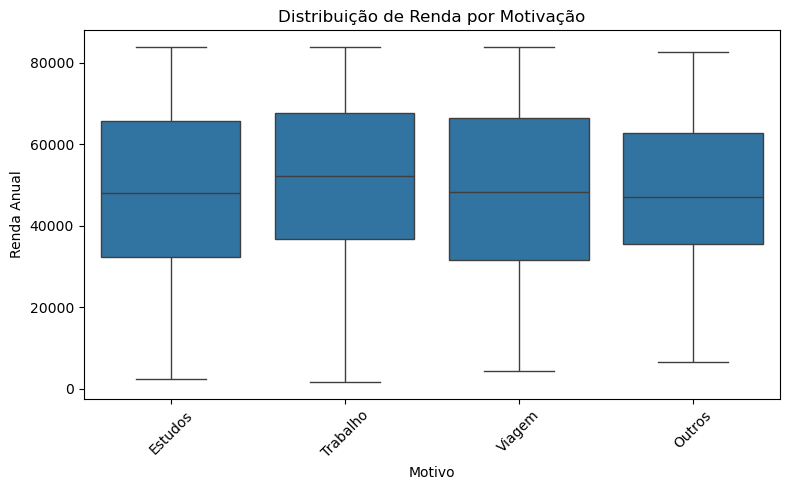

In [279]:
fig, ax2 = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_LinguaLab, x='Motivo', y='Renda_anual', ax=ax2)
ax2.set_title('Distribuição de Renda por Motivação')
ax2.set_xlabel('Motivo')
ax2.set_ylabel('Renda Anual')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

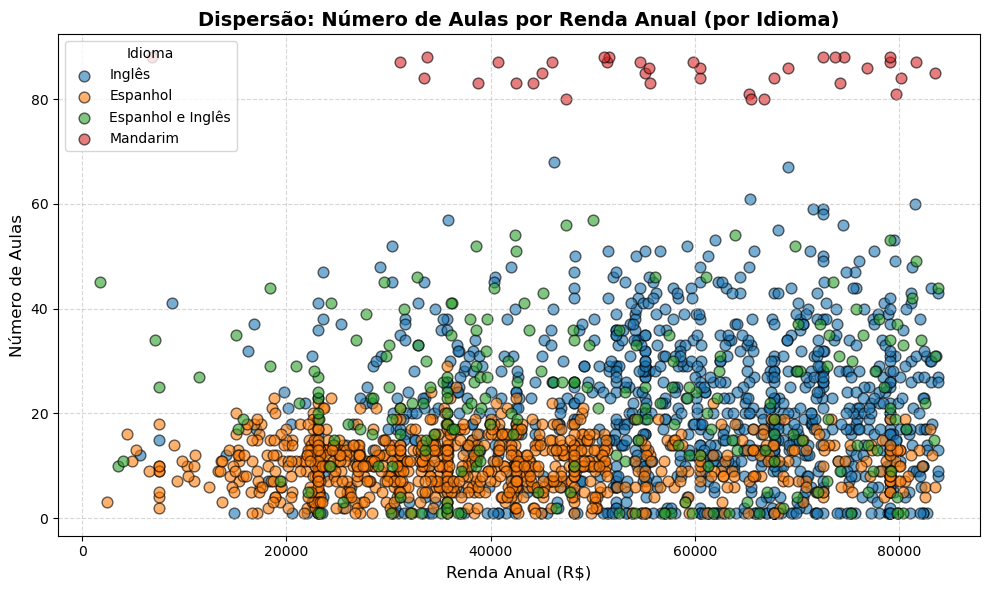

In [323]:
plt.figure(figsize=(10, 6))

for idioma in df_LinguaLab["Aulas"].unique():
    dados_idioma = df_LinguaLab[df_LinguaLab["Aulas"] == idioma]
    plt.scatter(dados_idioma["Renda_anual"], dados_idioma["Num_Aulas"],
                label=idioma, alpha=0.6, s=60, edgecolors='black')

plt.title("Dispersão: Número de Aulas por Renda Anual (por Idioma)", fontsize=14, fontweight='bold')
plt.xlabel("Renda Anual (R$)", fontsize=12)
plt.ylabel("Número de Aulas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Idioma")
plt.tight_layout()
plt.show()

In [326]:
df_mandarim = df_LinguaLab[df_LinguaLab['Aulas'] == 'Mandarim'].copy()

df_mandarim['Motivo'].value_counts(normalize=True)

Motivo
Trabalho    0.729730
Estudos     0.108108
Viagem      0.081081
Outros      0.081081
Name: proportion, dtype: float64

In [331]:
df_mandarim = df_LinguaLab[df_LinguaLab['Aulas'] == 'Inglês'].copy()

df_mandarim['Motivo'].value_counts(normalize=True)

Motivo
Trabalho    0.436192
Estudos     0.333682
Viagem      0.191423
Outros      0.038703
Name: proportion, dtype: float64

In [329]:
df_mandarim = df_LinguaLab[df_LinguaLab['Aulas'] == 'Espanhol'].copy()

df_mandarim['Motivo'].value_counts(normalize=True)

Motivo
Estudos     0.377702
Trabalho    0.324232
Viagem      0.233220
Outros      0.064846
Name: proportion, dtype: float64

In [328]:
df_mandarim = df_LinguaLab[df_LinguaLab['Aulas'] == 'Espanhol e Inglês'].copy()

df_mandarim['Motivo'].value_counts(normalize=True)

Motivo
Estudos     0.407407
Trabalho    0.365741
Viagem      0.180556
Outros      0.046296
Name: proportion, dtype: float64

C:\Users\pedro\AppData\Local\Temp\ipykernel_40028\1578323262.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df_LinguaLab[filtro_estudos].groupby('Education')['ID_Cliente'].count().sort_values(ascending=False)


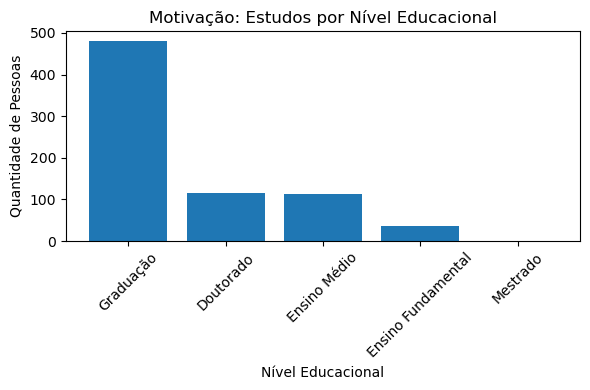

In [292]:
filtro_estudos = df_LinguaLab['Motivo'] == 'Estudos'
agrupado = df_LinguaLab[filtro_estudos].groupby('Education')['ID_Cliente'].count().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(agrupado.index, agrupado.values)
plt.xlabel('Nível Educacional')
plt.ylabel('Quantidade de Pessoas')
plt.title('Motivação: Estudos por Nível Educacional')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_40028\634284382.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_qtd_trabalho = df_LinguaLab[df_LinguaLab['Motivo'] == 'Trabalho'].groupby('Cidade').size().sort_values(ascending=False)


<Figure size 600x400 with 0 Axes>

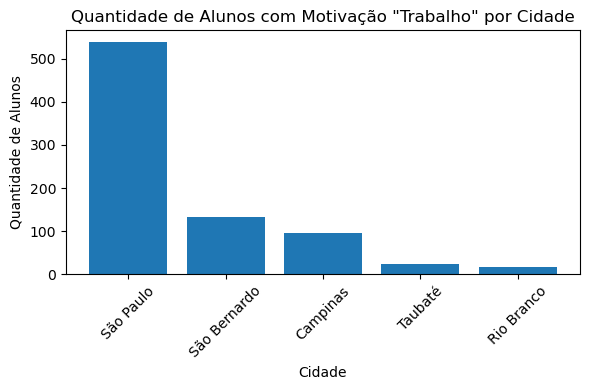

In [307]:
# Contagem absoluta de alunos com motivo "Trabalho" por cidade
df_qtd_trabalho = df_LinguaLab[df_LinguaLab['Motivo'] == 'Trabalho'].groupby('Cidade').size().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(df_qtd_trabalho.index, df_qtd_trabalho.values)
plt.title('Quantidade de Alunos com Motivação "Trabalho" por Cidade')
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Cidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


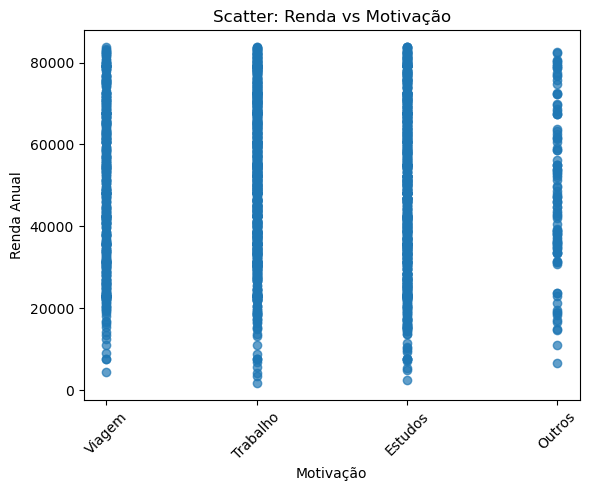

In [300]:

plt.scatter(df_LinguaLab['Motivo'], df_LinguaLab['Renda_anual'], alpha=0.7)
plt.xlabel('Motivação')
plt.ylabel('Renda Anual')
plt.title('Scatter: Renda vs Motivação')
plt.xticks(rotation=45)
plt.show()

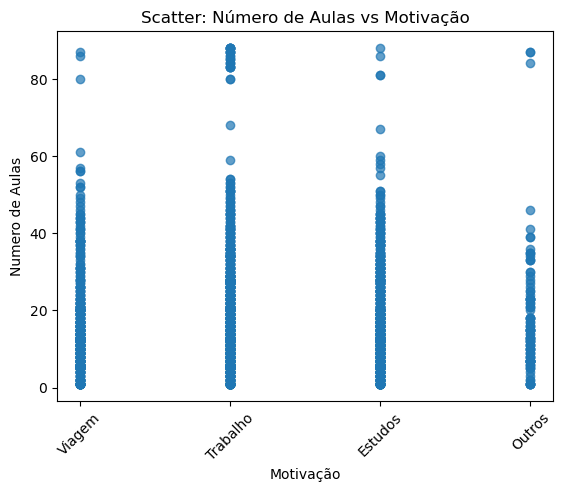

In [301]:

plt.scatter(df_LinguaLab['Motivo'], df_LinguaLab['Num_Aulas'], alpha=0.7)
plt.xlabel('Motivação')
plt.ylabel('Numero de Aulas')
plt.title('Scatter: Número de Aulas vs Motivação')
plt.xticks(rotation=45)
plt.show()

### Clusterização

In [283]:
df_cluster = df_LinguaLab[[
    'Motivo', 'Education', 'Cidade', 'Aulas', 'Categoria_Renda', 'Faixa_Etaria','NPS'
]].copy()

In [284]:
df_LinguaLab.head()

,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa,Idade,Categoria_Renda,Faixa_Etaria
0,0,Viagem,Graduação,São Paulo,58138.0,Inglês,4,19,1983,3.0,4.0,42,Alta,Sênior
1,1,Trabalho,Graduação,Taubaté,46344.0,Espanhol,4,10,1980,4.0,3.0,45,Média,Sênior
2,2,Estudos,Graduação,São Bernardo,71613.0,Inglês,3,59,1991,4.0,5.0,34,Alta,Adulto
3,3,Viagem,Graduação,São Paulo,23046.0,Espanhol,4,22,2010,1.0,1.0,15,Baixa,Jovem
4,4,Trabalho,Doutorado,São Paulo,58293.0,Inglês,3,8,2007,3.0,4.0,18,Alta,Jovem


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

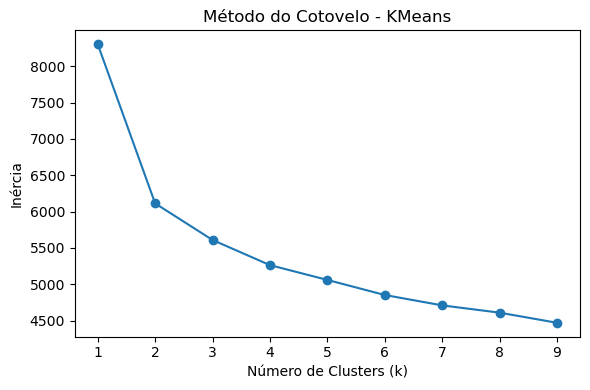

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


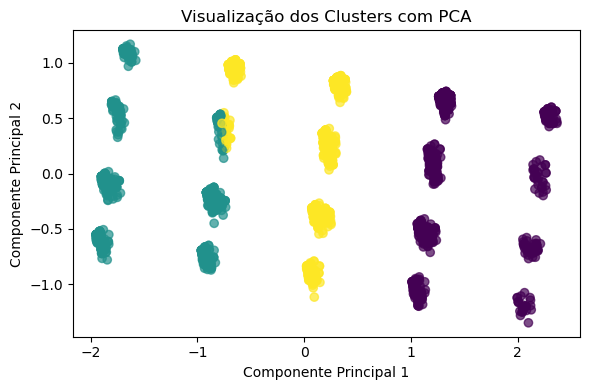

In [285]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df_dummies = pd.get_dummies(df_cluster, drop_first=True)

inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_dummies)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo - KMeans')
plt.tight_layout()
plt.show()

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_dummies)

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(df_dummies)

plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()

In [ ]:
df_perfil = df_cluster.copy()
df_perfil['Cluster'] = labels

# DEFINIR TIPOS DE VARIÁVEIS
variaveis_categoricas = ['Motivo', 'Education', 'Cidade', 'Aulas', 'Categoria_Renda', 'Faixa_Etaria']
variaveis_numericas = ['NPS']

print("🔍 INFORMAÇÕES GERAIS DOS CLUSTERS")
print(f"Total de registros: {len(df_perfil)}")
print(f"Número de clusters: {len(np.unique(labels))}")
print(f"Variáveis categóricas: {variaveis_categoricas}")
print(f"Variáveis numéricas: {variaveis_numericas}")

print("\nDistribuição dos clusters:")
distribuicao = df_perfil['Cluster'].value_counts().sort_index()
for cluster, count in distribuicao.items():
    print(f"  Cluster {cluster}: {count} registros ({count/len(df_perfil)*100:.1f}%)")

print("\n" + "="*70)
print("📊 ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("="*70)

# Função para gerar perfis categóricos (APENAS variáveis categóricas)
def perfil_categorias(df, cluster_col='Cluster'):
    perfil = {}
    
    for cat in variaveis_categoricas:  # USAR APENAS AS CATEGÓRICAS
        if cat in df.columns:
            print(f"\n📊 Analisando: {cat}")
            
            # Calcular proporções por cluster
            crosstab = pd.crosstab(df[cluster_col], df[cat], normalize='index')
            perfil[cat] = (crosstab * 100).round(1)  # Converter para percentual
            
            # Mostrar resultado formatado
            print(f"\n=== PERFIL POR CLUSTER: {cat} ===")
            print("(Valores em percentual dentro de cada cluster)\n")
            
            # Criar tabela mais legível
            tabela = perfil[cat]
            
            # Cabeçalho
            print(f"{'Cluster':<8}", end="")
            for col in tabela.columns:
                print(f"{str(col)[:12]:<15}", end="")  
            print()
            print("-" * (8 + 15 * len(tabela.columns)))
            
            # Dados
            for idx in tabela.index:
                print(f"{idx:<8}", end="")
                for col in tabela.columns:
                    valor = tabela.loc[idx, col]
                    if pd.isna(valor):
                        print(f"{'0.0%':<15}", end="")
                    else:
                        print(f"{valor:.1f}%{'':<10}", end="")
                print()
            
            # Destacar características principais de cada cluster
            print(f"\n🎯 Características principais:")
            for cluster in sorted(tabela.index):
                valores_cluster = tabela.loc[cluster].fillna(0)
                categoria_dominante = valores_cluster.idxmax()
                percentual_max = valores_cluster.max()
                print(f"  Cluster {cluster}: {categoria_dominante} ({percentual_max:.1f}%)")
    
    return perfil

# Função para gerar perfis numéricos
def perfil_numericas(df, cluster_col='Cluster'):
    print(f"\n📈 ANÁLISE DE VARIÁVEIS NUMÉRICAS")
    print("="*70)
    
    for var in variaveis_numericas:  # USAR APENAS AS NUMÉRICAS
        if var in df.columns:
            print(f"\n📉 Analisando: {var}")
            
            # Estatísticas por cluster
            stats = df.groupby(cluster_col)[var].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
            
            print(f"\n=== PERFIL POR CLUSTER: {var} ===")
            print(f"{'Cluster':<10}{'Count':<8}{'Média':<10}{'Mediana':<10}{'Desvio':<10}{'Min':<8}{'Max':<8}")
            print("-" * 66)
            
            for cluster in sorted(stats.index):
                row = stats.loc[cluster]
                print(f"{cluster:<10}{int(row['count']):<8}{row['mean']:<10.2f}{row['median']:<10.2f}{row['std']:<10.2f}{row['min']:<8.2f}{row['max']:<8.2f}")
            
            # Análise comparativa
            print(f"\n🎯 Comparação com média geral:")
            media_geral = df[var].mean()
            for cluster in sorted(stats.index):
                media_cluster = stats.loc[cluster, 'mean']
                diferenca = ((media_cluster - media_geral) / media_geral) * 100
                if diferenca > 10:
                    status = f"MUITO ACIMA (+{diferenca:.1f}%)"
                elif diferenca > 5:
                    status = f"ACIMA (+{diferenca:.1f}%)"
                elif diferenca < -10:
                    status = f"MUITO ABAIXO ({diferenca:.1f}%)"
                elif diferenca < -5:
                    status = f"ABAIXO ({diferenca:.1f}%)"
                else:
                    status = f"SIMILAR ({diferenca:.1f}%)"
                print(f"  Cluster {cluster}: {media_cluster:.2f} - {status}")

# Gerar perfis
perfis_clusters = perfil_categorias(df_perfil)
perfil_numericas(df_perfil)

print("\n" + "="*70)
print("📋 RESUMO EXECUTIVO DOS CLUSTERS")
print("="*70)

# Criar resumo executivo
for cluster in sorted(df_perfil['Cluster'].unique()):
    dados_cluster = df_perfil[df_perfil['Cluster'] == cluster]
    tamanho = len(dados_cluster)
    percentual = (tamanho / len(df_perfil)) * 100
    
    print(f"\n🏷️  CLUSTER {cluster}")
    print(f"📊 Tamanho: {tamanho} pessoas ({percentual:.1f}% do total)")
    print("-" * 50)
    
    # Características categóricas dominantes
    print("🎯 Perfil Categórico:")
    for variavel in variaveis_categoricas:
        if variavel in dados_cluster.columns:
            moda = dados_cluster[variavel].mode()
            if len(moda) > 0:
                valor_principal = moda[0]
                contagem = dados_cluster[variavel].value_counts()[valor_principal]
                percentual_var = (contagem / tamanho) * 100
                print(f"  • {variavel}: {valor_principal} ({percentual_var:.1f}%)")
    
    # Características numéricas
    print("📈 Perfil Numérico:")
    for variavel in variaveis_numericas:
        if variavel in dados_cluster.columns:
            media = dados_cluster[variavel].mean()
            mediana = dados_cluster[variavel].median()
            desvio = dados_cluster[variavel].std()
            print(f"  • {variavel}: média {media:.2f}, mediana {mediana:.2f}, desvio {desvio:.2f}")

print("\n✅ Análise completa concluída!")

🔍 INFORMAÇÕES GERAIS DOS CLUSTERS
Total de registros: 2088
Número de clusters: 3
Variáveis categóricas: ['Motivo', 'Education', 'Cidade', 'Aulas', 'Categoria_Renda', 'Faixa_Etaria']
Variáveis numéricas: ['NPS']

Distribuição dos clusters:
  Cluster 0: 634 registros (30.4%)
  Cluster 1: 692 registros (33.1%)
  Cluster 2: 762 registros (36.5%)

📊 ANÁLISE DE VARIÁVEIS CATEGÓRICAS

📊 Analisando: Motivo

=== PERFIL POR CLUSTER: Motivo ===
(Valores em percentual dentro de cada cluster)

Cluster Estudos        Trabalho       Viagem         Outros         
--------------------------------------------------------------------
0       33.1%          40.7%          20.7%          5.5%          
1       38.9%          32.1%          23.0%          6.1%          
2       34.6%          43.0%          18.4%          3.9%          

🎯 Características principais:
  Cluster 0: Trabalho (40.7%)
  Cluster 1: Estudos (38.9%)
  Cluster 2: Trabalho (43.0%)

📊 Analisando: Education

=== PERFIL POR CLUSTER: Ed